In [1]:
#%matplotlib notebook
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
import glob
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

In [2]:
import tfs
data_frame = tfs.read('/Users/admin/Desktop/Cern_stuff/New_sim/twiss_ua9_2018_fl_no_sfx.tfs')
data_frame.columns

Index(['NAME', 'KEYWORD', 'S', 'L', 'TILT', 'KICK', 'HKICK', 'VKICK', 'ANGLE',
       'K0L', 'K0SL', 'K1L', 'K1SL', 'K2L', 'K2SL', 'K3L', 'K3SL', 'BETX',
       'BETY', 'X', 'PX', 'Y', 'PY', 'DX', 'DPX', 'DY', 'DPY', 'ALFX', 'ALFY'],
      dtype='object')

In [3]:
data_frame['BETX']

0       104.259390
1       104.259390
2       107.177174
3       103.618717
4        91.821163
           ...    
3874    102.835459
3875    103.392360
3876    104.081876
3877    104.259390
3878    104.259390
Name: BETX, Length: 3879, dtype: float64

In [4]:
y = np.random.normal(size=10000)

# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    N, mu, sig = p
    return N/np.sqrt(2.*np.pi*sig**2.)*np.exp(-np.power((x - mu), 2.)/(2. * sig**2.))


def res(y,unit = '$\mu$rad'):
    name = y.name
    y = np.array(y)
    rms = np.std(y)
    mean = np.mean(y)
    print (mean)
#     y = y-mean
    fig, ax = plt.subplots()
    xbins = np.linspace(mean-3*rms,mean+3*rms,101)
    n,xbins,_ = ax.hist(y, bins=xbins, histtype='step', label='data')
    bin_center = 0.5 * (xbins[1:] + xbins[:-1])
    p_initial = [np.max(y), mean, rms]
    popt, pcov = curve_fit(gauss, bin_center, n, p0=p_initial)

    #fit parameters
    mu, sigma = popt[1], np.abs(popt[2])
    print("mean  fit: ", mu)
    print("sigma fit: ", sigma)

    # Generate y-data based on the fit.
    y_fit = gauss(bin_center, *popt)
    ax.plot(bin_center, y_fit, color = 'red', label='fit')

    ax.grid()
    leg = ax.legend()

    ax.set_xlabel(name)
    ax.set_title( r"$\sigma$ = %g " % (sigma)+unit)
    plt.tight_layout()
    plt.show()

    return sigma

#fig, ax = plt.subplots()
#xbins = 41
#n,xbins,_ = ax.hist(y, bins=xbins, histtype='step', label='data');
#bin_center = 0.5 * (xbins[1:] + xbins[:-1])
#p_initial = [1.0, 0.0, 1]
#popt, pcov = curve_fit(gauss, bin_center, n, p0=p_initial)

# Generate y-data based on the fit.
#y_fit = gauss(bin_center, *popt)


#print("mean  fit: ", popt[1])
#print("sigma fit: ", popt[2])
#print("np.sdt:                      ", np.std(y))
#mu = np.mean(y)
#print("sqrt(mean(y-mean(y))**2)))   ", np.sqrt( np.mean( (y - mu)**2 ) ))
#print("sqrt(mean(y**2) - mean(y)**2)", np.sqrt( np.mean(y**2) - np.mean(y)**2))

In [5]:
#Area TCSM in
xbins = np.linspace(0,30000,30001)

def area(minim,maxim):
    values, bins, _ = plt.hist(df_trj['Z'],bins=xbins)
    
    k = bins[(bins>minim) & (bins<maxim)]
    start = np.where(bins==k[0])[0][0]
    end = np.where(bins==k[-1])[0][0]
    area = sum(np.diff(bins[start:end])*values[start:end-1])
    return area

In [6]:
data_frame = tfs.read('/Users/admin/Desktop/Cern_stuff/New_sim/twiss_ua9_2018_fl_no_sfx.tfs')

def read_file_trj(fname):
    columns = "NCASE IJ IONZ IONA PLA X Y Z TXX TYY TZZ WEIGHT LLOUSE ISAMPLE NEWREG NPASSAGE LTRACK ZLAST".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_flka(fname):
    columns = "XFLK YFLK ZFLK TXFLK TYFLK TZFLK PMOFLK TKEFLK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_norm(fname):
    columns = "CSIB_X CSIBXP CSIB_Y CSIBYP CSIDSP".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_real(fname):
    columns = "XX XP YY YP PPART".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def loop_dir (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE','NCASE'])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def loop_dir_coord (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE',frame.index])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def read_file_cry(fname):
    columns = "NCASE JTRACK X Y ZSCO TXCRY TYCRY TZCRY CXTRCK CYTRCK INITX KICK PTOT DELTEN KCHNNL ISTATE NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_mgdrw(fname):
    columns = "NCASE JTRACK IZ IA XSCO YSCO ZSCO CXTRCK CYTRCK PTOT LTRACK NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_99(fname, sigma_res=0):
    columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    #df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=1)
    
    #columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
    
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

   # df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_98(fname, sigma_res=0):
    columns = "NCASE ICODE REG Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

    #df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_96(fname, sigma_res=0):
    columns = "NCASE ICODE REG ETRACK Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)

    #df['count'] = df.groupby(['ICODE']).transform('count')
    return df

In [7]:
dirname = '/Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_*'

df_flk = loop_dir_coord(dirname,'lss5-double_exp001_flka_coord.dat',read_file_flka)
df_nrm = loop_dir_coord(dirname,'lss5-double_exp001_norm_coord.dat',read_file_norm)
df_rea = loop_dir_coord(dirname,'lss5-double_exp001_real_coord.dat',read_file_real)

df_trj = loop_dir(dirname,'lss5-double_exp001_usrmed.dat',read_file_trj)

df_60 = loop_dir(dirname,'lss5-double_exp001_fort.60',read_file_mgdrw); #Enter crystal
df_61 = loop_dir(dirname,'lss5-double_exp001_fort.61',read_file_mgdrw); #Exit crystal

df_cry = loop_dir(dirname,'lss5-double_exp001_fort.51',read_file_cry);


df_99 = loop_dir(dirname,'lss5-double_exp001_fort.99',read_file_99) #NI CRY
df_98 = loop_dir(dirname,'lss5-double_exp001_fort.98',read_file_98) #NI absorber
df_96 = loop_dir(dirname,'lss5-double_exp001_fort.96',read_file_96)


#df_wht = loop_dir(dirname,'lss5-double_exp001_fort.24',read_file_mgdrw) can't read
df_40 = loop_dir(dirname,'lss5-double_exp001_fort.40',read_file_mgdrw) #Enter TCSM
df_41 = loop_dir(dirname,'lss5-double_exp001_fort.41',read_file_mgdrw) #Exit TCSM
df_42 = loop_dir(dirname,'lss5-double_exp001_fort.42',read_file_mgdrw) #Enter TACW 57 files, 72 rows
df_43 = loop_dir(dirname,'lss5-double_exp001_fort.43',read_file_mgdrw)

df_tcsm = pd.merge(df_cry, df_98,left_index=True, right_index=True, suffixes=('_cry','_tcsm'))
df_usr = pd.merge(df_cry, df_trj,left_index=True, right_index=True, suffixes=('_usr','_tcsm'))

/Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_*/lss5-double_exp001_flka_coord.dat
0 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_023/lss5-double_exp001_flka_coord.dat
1 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_024/lss5-double_exp001_flka_coord.dat
2 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_012/lss5-double_exp001_flka_coord.dat
3 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_015/lss5-double_exp001_flka_coord.dat
4 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_041/lss5-double_exp001_flka_coord.dat
5 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_079/lss5-double_exp001_flka_coord.dat
6 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_046/lss5-double_exp001_flka_coord.dat
7 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_084/lss5-double_exp001_flka_coord.dat
8 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_070/lss5-double_exp001

82 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_059/lss5-double_exp001_flka_coord.dat
83 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_095/lss5-double_exp001_flka_coord.dat
84 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_061/lss5-double_exp001_flka_coord.dat
85 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_057/lss5-double_exp001_flka_coord.dat
86 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_068/lss5-double_exp001_flka_coord.dat
87 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_050/lss5-double_exp001_flka_coord.dat
88 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_033/lss5-double_exp001_flka_coord.dat
89 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_034/lss5-double_exp001_flka_coord.dat
90 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_002/lss5-double_exp001_flka_coord.dat
91 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_005/lss5

90 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_002/lss5-double_exp001_norm_coord.dat
91 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_005/lss5-double_exp001_norm_coord.dat
92 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_051/lss5-double_exp001_norm_coord.dat
93 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_056/lss5-double_exp001_norm_coord.dat
94 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_069/lss5-double_exp001_norm_coord.dat
95 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_060/lss5-double_exp001_norm_coord.dat
96 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_094/lss5-double_exp001_norm_coord.dat
97 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_093/lss5-double_exp001_norm_coord.dat
98 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_067/lss5-double_exp001_norm_coord.dat
99 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_058/lss5

75 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_019/lss5-double_exp001_real_coord.dat
76 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_004/lss5-double_exp001_real_coord.dat
77 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_003/lss5-double_exp001_real_coord.dat
78 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_035/lss5-double_exp001_real_coord.dat
79 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_032/lss5-double_exp001_real_coord.dat
80 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_066/lss5-double_exp001_real_coord.dat
81 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_092/lss5-double_exp001_real_coord.dat
82 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_059/lss5-double_exp001_real_coord.dat
83 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_095/lss5-double_exp001_real_coord.dat
84 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_061/lss5

68 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_043/lss5-double_exp001_usrmed.dat
69 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_044/lss5-double_exp001_usrmed.dat
70 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_010/lss5-double_exp001_usrmed.dat
71 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_017/lss5-double_exp001_usrmed.dat
72 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_028/lss5-double_exp001_usrmed.dat
73 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_021/lss5-double_exp001_usrmed.dat
74 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_026/lss5-double_exp001_usrmed.dat
75 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_019/lss5-double_exp001_usrmed.dat
76 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_004/lss5-double_exp001_usrmed.dat
77 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_003/lss5-double_exp001_usrmed.dat
78 /Users/

68 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_043/lss5-double_exp001_fort.60
69 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_044/lss5-double_exp001_fort.60
70 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_010/lss5-double_exp001_fort.60
71 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_017/lss5-double_exp001_fort.60
72 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_028/lss5-double_exp001_fort.60
73 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_021/lss5-double_exp001_fort.60
74 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_026/lss5-double_exp001_fort.60
75 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_019/lss5-double_exp001_fort.60
76 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_004/lss5-double_exp001_fort.60
77 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_003/lss5-double_exp001_fort.60
78 /Users/admin/Desktop/Cern_stuff/New_s

56 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_073/lss5-double_exp001_fort.61
57 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_027/lss5-double_exp001_fort.61
58 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_018/lss5-double_exp001_fort.61
59 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_020/lss5-double_exp001_fort.61
60 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_016/lss5-double_exp001_fort.61
61 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_029/lss5-double_exp001_fort.61
62 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_011/lss5-double_exp001_fort.61
63 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_072/lss5-double_exp001_fort.61
64 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_086/lss5-double_exp001_fort.61
65 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_081/lss5-double_exp001_fort.61
66 /Users/admin/Desktop/Cern_stuff/New_s

46 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_030/lss5-double_exp001_fort.51
47 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_039/lss5-double_exp001_fort.51
48 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_006/lss5-double_exp001_fort.51
49 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_001/lss5-double_exp001_fort.51
50 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_045/lss5-double_exp001_fort.51
51 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_089/lss5-double_exp001_fort.51
52 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_042/lss5-double_exp001_fort.51
53 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_074/lss5-double_exp001_fort.51
54 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_080/lss5-double_exp001_fort.51
55 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_087/lss5-double_exp001_fort.51
56 /Users/admin/Desktop/Cern_stuff/New_s

83 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_095/lss5-double_exp001_fort.99
84 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_061/lss5-double_exp001_fort.99
85 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_057/lss5-double_exp001_fort.99
86 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_068/lss5-double_exp001_fort.99
87 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_050/lss5-double_exp001_fort.99
88 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_033/lss5-double_exp001_fort.99
89 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_034/lss5-double_exp001_fort.99
90 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_002/lss5-double_exp001_fort.99
91 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_005/lss5-double_exp001_fort.99
92 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_051/lss5-double_exp001_fort.99
93 /Users/admin/Desktop/Cern_stuff/New_s

84 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_061/lss5-double_exp001_fort.98
85 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_057/lss5-double_exp001_fort.98
86 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_068/lss5-double_exp001_fort.98
87 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_050/lss5-double_exp001_fort.98
88 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_033/lss5-double_exp001_fort.98
89 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_034/lss5-double_exp001_fort.98
90 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_002/lss5-double_exp001_fort.98
91 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_005/lss5-double_exp001_fort.98
92 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_051/lss5-double_exp001_fort.98
93 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_056/lss5-double_exp001_fort.98
94 /Users/admin/Desktop/Cern_stuff/New_s

94 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_069/lss5-double_exp001_fort.96
95 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_060/lss5-double_exp001_fort.96
96 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_094/lss5-double_exp001_fort.96
97 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_093/lss5-double_exp001_fort.96
98 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_067/lss5-double_exp001_fort.96
99 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_058/lss5-double_exp001_fort.96
Files processed 100
# 738501
/Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_*/lss5-double_exp001_fort.40
0 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_023/lss5-double_exp001_fort.40
1 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_024/lss5-double_exp001_fort.40
2 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_012/lss5-double_exp001_fort.40
3 /Users/admin/Desk

98 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_067/lss5-double_exp001_fort.40
99 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_058/lss5-double_exp001_fort.40
Files processed 100
# 639928
/Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_*/lss5-double_exp001_fort.41
0 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_023/lss5-double_exp001_fort.41
1 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_024/lss5-double_exp001_fort.41
2 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_012/lss5-double_exp001_fort.41
3 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_015/lss5-double_exp001_fort.41
4 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_041/lss5-double_exp001_fort.41
5 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_079/lss5-double_exp001_fort.41
6 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_046/lss5-double_exp001_fort.41
7 /Users/admin/Desktop/

4 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_013/lss5-double_exp001_fort.42
5 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_071/lss5-double_exp001_fort.42
6 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_085/lss5-double_exp001_fort.42
7 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_047/lss5-double_exp001_fort.42
8 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_091/lss5-double_exp001_fort.42
9 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_053/lss5-double_exp001_fort.42
10 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_098/lss5-double_exp001_fort.42
11 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_038/lss5-double_exp001_fort.42
12 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_007/lss5-double_exp001_fort.42
13 /Users/admin/Desktop/Cern_stuff/New_sim/TCSM_final_extgeo/run_031/lss5-double_exp001_fort.42
14 /Users/admin/Desktop/Cern_stuff/New_sim/TCS

In [8]:
#COUNT ALL PARTICLES: USRMED + fort.99 inelastic
print(len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11])+len(df_96.loc[df_96['ICODE']==12]))
print(len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_99.loc[df_99['ICODE']==101])+len(df_98.loc[df_98['ICODE']==101])+len(df_96.loc[df_96['ICODE']==12]))

#Thus 65 particles missing

1000000
1000000


In [9]:
print('USRMED primaries in aperture', df_trj.loc[(df_trj['Z']<25400) & (df_trj['LTRACK']==1),'Z'].count())
print('USRMED end of geometry primaries', df_trj.loc[(df_trj['Z']>25400) & (df_trj['LTRACK']==1),'Z'].count())

USRMED primaries in aperture 31782
USRMED end of geometry primaries 441081


/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_56451/2459009486.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_dis.show()


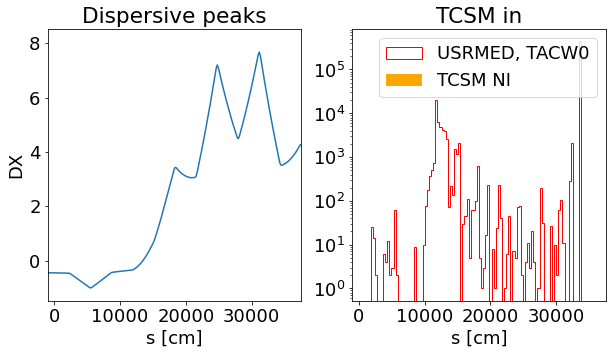

In [10]:
S = data_frame['S']
DX = data_frame['DX']
DY = data_frame['DY']

fig_dis, ax_dis = plt.subplots(1,2,figsize=(10,5))

ax_dis[0].plot((S-(5129.9275))*100,DX)
ax_dis[0].set_title('Dispersive peaks')
ax_dis[0].set_xlabel('s [cm]')
ax_dis[0].set_ylabel('DX')
ax_dis[0].set_xlim(-1000,37500)


ax_dis[1].hist(df_trj['Z'], bins=101, histtype='step', log=True,label='USRMED, TACW0',color='red')
ax_dis[1].hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=101,label='TCSM NI',color='orange',log=True,histtype='bar',stacked=True);

#ax_dis[1].hist(df_flk['ZFLK'], bins=xbins, histtype='step', log=True,label='FLUKA',color='orange')
ax_dis[1].set_title('TCSM in')
ax_dis[1].set_xlabel('s [cm]')
ax_dis[1].set_xlim(-1000,37500)
#ax_dis[1].set_xlim(25400,27000)

ax_dis[1].legend()


fig_dis.show()

In [11]:
merge_96 = pd.merge(df_trj,df_96,left_index=True, right_index=True,how='right', suffixes=('_usr','_cry'))

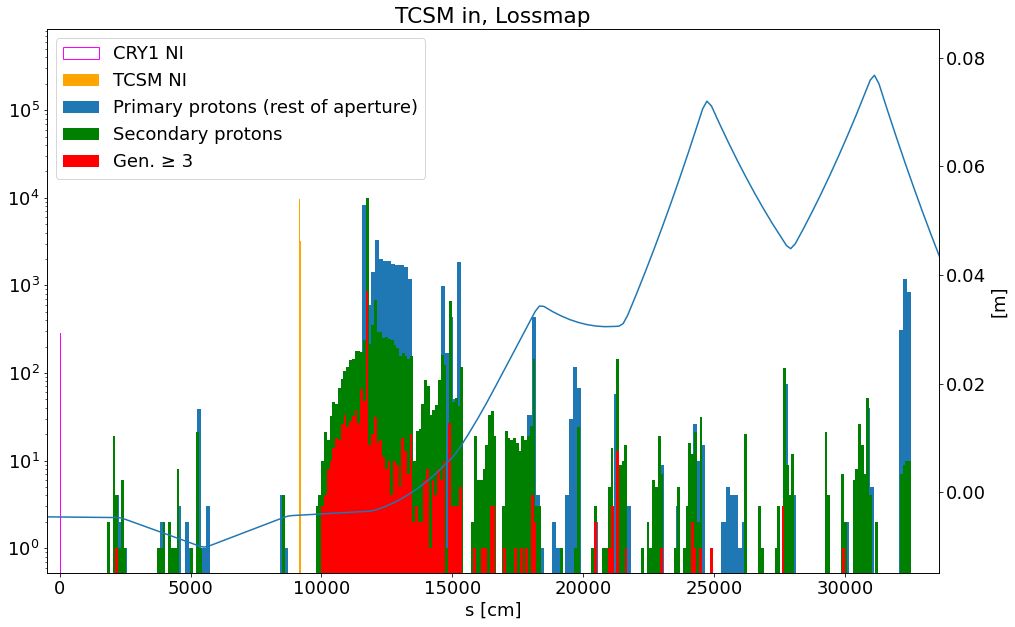

In [12]:
fig_tacw, ax_1 = plt.subplots(figsize=(16,10))
ax_2 = ax_1.twinx() 
ax_2.plot((S-(5129.9275))*100,DX*0.01)
ax_2.set_ylabel('[m]')


ax_1.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=5,label='CRY1 NI',color='magenta',log=True,histtype='step',stacked=True);
ax_1.hist(df_98.loc[df_98['ICODE']==101,'Z'],bins=101,label='TCSM NI',color='orange',log=True,histtype='bar',stacked=True);

ax_1.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=201,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True);
ax_1.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=301,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True);
ax_1.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=301,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True);
#ax_1.vlines(18400,0,100,'r')
#ax_1.vlines(24750,0,100,'r')
ax_1.set_xlim(-500,33600)
ax_1.set_xlabel('s [cm]')
ax_1.set_title('TCSM in, Lossmap')
ax_1.legend(loc='upper left')

In [13]:
data_frame.columns

Index(['NAME', 'KEYWORD', 'S', 'L', 'TILT', 'KICK', 'HKICK', 'VKICK', 'ANGLE',
       'K0L', 'K0SL', 'K1L', 'K1SL', 'K2L', 'K2SL', 'K3L', 'K3SL', 'BETX',
       'BETY', 'X', 'PX', 'Y', 'PY', 'DX', 'DPX', 'DY', 'DPY', 'ALFX', 'ALFY'],
      dtype='object')

Area around dispesive peak 17500-19500: 773.00
Area around dispesive peak 23700-25700 (end of geometry): 161.00
Loss right before end of geometry at dispersive peak 25300-25400: 2.00


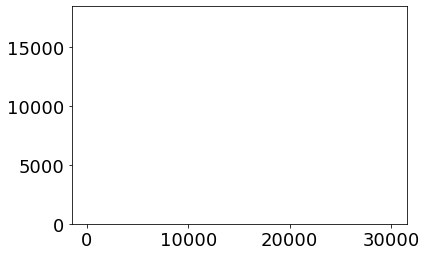

In [14]:
print(f'Area around dispesive peak 17500-19500: {area(17500,19500):.2f}')
print(f'Area around dispesive peak 23700-25700 (end of geometry): {area(23700,25700):.2f}')
print(f'Loss right before end of geometry at dispersive peak 25300-25400: {area(25300,25400):.2f}')

105.45619769173325
mean  fit:  164.94316867649516
sigma fit:  7.230697821144615


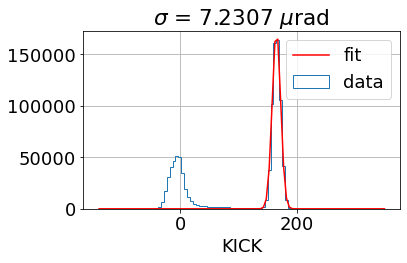

ISTATE
-1       800
 0     50922
 1    163511
 2     97255
 3    627592
 4       114
 5     50112
Name: ISTATE, dtype: int64


In [15]:
res(df_cry['KICK']*1e6)
print(df_cry.groupby(['ISTATE'])['ISTATE'].count())

In [16]:
print('Interactions with the crystal:\n')
print(f'Amorphous: {(800+50922+163511)/1e6*100:.1f}%')
print(f'Dechannelling: {97255/1e6*100:.1f}%')
print(f'Channelling: {627592/1e6*100:.1f}%')
print(f'Volume Capture: {114/1e6*100:.1f}%')
print(f'Volume reflection: {50112/1e6*100:.1f}%')

Interactions with the crystal:

Amorphous: 21.5%
Dechannelling: 9.7%
Channelling: 62.8%
Volume Capture: 0.0%
Volume reflection: 5.0%


(0.0, 9100.0)

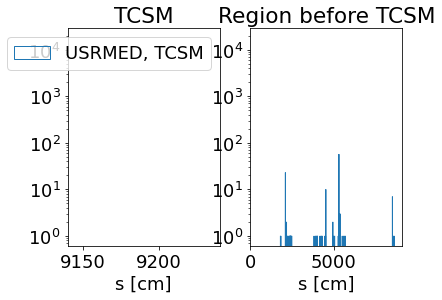

In [17]:
fig,ax = plt.subplots(1,2)
ax[0].hist(df_trj['Z'], bins=xbins, histtype='step', log=True,label='USRMED, TCSM')
ax[0].set_title('TCSM')
ax[0].set_xlabel('s [cm]')
ax[0].legend()
ax[0].set_xlim(9140,9240)

ax[1].hist(df_trj['Z'], bins=xbins, histtype='step', log=True)
ax[1].set_title('Region before TCSM')
ax[1].set_xlabel('s [cm]')
ax[1].set_xlim(0,9100)

-1, 0, 1: amorphous

2: dechanneling

3: channeling

4: volume capture  

5: volume reflection

In [18]:
df_tcsm.columns

Index(['JTRACK', 'X', 'Y', 'ZSCO', 'TXCRY', 'TYCRY', 'TZCRY', 'CXTRCK',
       'CYTRCK', 'INITX', 'KICK', 'PTOT', 'DELTEN', 'KCHNNL', 'ISTATE',
       'NPASSAGE', 'count', 'ICODE', 'REG', 'Z'],
      dtype='object')

In [19]:
df_usr.loc[df_usr['LTRACK']==1]

JTRACK     X_usr     Y_usr       ZSCO     TXCRY         TYCRY  \
IFILE NCASE                                                                  
0     2           1 -0.257586 -0.054756  97.300002  0.000047 -2.930283e-05   
      5           1 -0.252448  0.010893  97.300000  0.000037 -4.693472e-06   
      7           1 -0.262163  0.015205  97.300001  0.000062  5.161721e-06   
      8           1 -0.271797  0.069640  97.300001  0.000048  2.714314e-05   
      17          1 -0.257947 -0.096872  97.300001  0.000053 -1.456053e-05   
...             ...       ...       ...        ...       ...           ...   
99    9992        1 -0.253320  0.000635  97.300000  0.000042 -6.678385e-06   
      9994        1 -0.255782 -0.008312  97.300000  0.000045  2.425261e-07   
      9995        1 -0.251727  0.083984  97.300001  0.000049  2.966890e-05   
      9996        1 -0.257278 -0.075189  97.300001  0.000058  9.756273e-07   
      9998        1 -0.256414 -0.040117  97.300000  0.000037 -7.107782e-06   

             TZCRY    CXTRCK        CYTRCK         INITX  ...           TYY  \
IFILE NCASE                                               ...                 
0     2        1.0 -0.000108 -2.932523e-05 -5.038880e-06  ... -1.658636e-04   
      5        1.0  0.000057 -6.313847e-06 -1.511214e-05  ... -1.297425e-06   
      7        1.0  0.000057 -2.663531e-06  1.000829e-05  ...  1.328312e-06   
      8        1.0  0.000069  4.064855e-05 -4.023577e-06  ...  3.306189e-05   
      17       1.0 -0.000113 -1.451797e-05  9.392231e-07  ...  4.681712e-04   
...            ...       ...           ...           ...  ...           ...   
99    9992     1.0  0.000053 -7.367444e-07 -1.023643e-05  ... -2.638052e-07   
      9994     1.0  0.000051  6.445574e-06 -6.451821e-06  ...  1.820982e-06   
      9995     1.0 -0.000121  2.968451e-05 -2.723098e-06  ... -3.737424e-04   
      9996     1.0 -0.000120  9.800781e-07  5.914182e-06  ...  3.417351e-04   
      9998     1.0  0.000069 -3.398232e-06 -1.500566e-05  ... -8.826858e-06   

                  TZZ  WEIGHT  LLOUSE  ISAMPLE  NEWREG  NPASSAGE_tcsm  LTRACK  \
IFILE NCASE                                                                     
0     2      0.975963     1.0       2        0     643              1       1   
      5      0.976000     1.0       1        0     643              1       1   
      7      0.975999     1.0       1        0     643              1       1   
      8      0.976003     1.0       1        0     643              1       1   
      17     0.979712     1.0       2        0      46              1       1   
...               ...     ...     ...      ...     ...            ...     ...   
99    9992   0.975998     1.0       1        0     643              1       1   
      9994   0.975998     1.0       1        0     643              1       1   
      9995   0.975970     1.0       2        0     643              1       1   
      9996   0.975969     1.0       2        0     643              1       1   
      9998   0.976004     1.0       1        0     643              1       1   

                    ZLAST  count_tcsm  
IFILE NCASE                            
0     2      33790.542155           1  
      5      33790.540947           1  
      7      33790.539534           1  
      8      33790.537621           1  
      17     32409.654425           1  
...                   ...         ...  
99    9992   33790.541091           1  
      9994   33790.540826           1  
      9995   33790.414885           1  
      9996   33790.429006           1  
      9998   33790.539539           1  

[464364 rows x 35 columns]

(0.0, 35000.0)

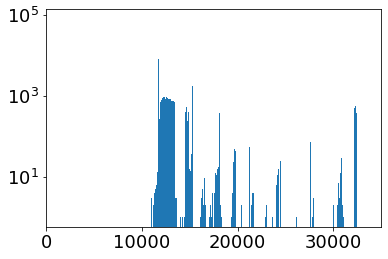

In [20]:
plt.hist(df_usr.loc[(df_usr['ISTATE']==3) & (df_usr['LTRACK']==1),'Z'],bins=301,log=True);
plt.xlim(0,35000)

In [21]:
end_all = df_usr['Z'][df_usr['Z'] >= 33600].count()
parts_end = [df_usr.loc[(df_usr['Z'] >= 33600) & (df_usr['ISTATE']==i)]['Z'].count() for i in range(-1,6)]

print('END OF GEOMETRY\n_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _')
for i,j in zip(range(len(parts_end)),range(-1,6)):
    #print('ISTATE',j,':',parts_end[i]/end_all*100,'%')
    print(f'ISTATE {j}: {parts_end[i]/end_all*100:.2f}%')
    
#0.04830973112347281+14.510070720872662+46.68978292065198+24.472452019003732+0.000571712794360625+14.278812895553788


END OF GEOMETRY
_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _
ISTATE -1: 0.04%
ISTATE 0: 11.82%
ISTATE 1: 37.95%
ISTATE 2: 20.22%
ISTATE 3: 18.34%
ISTATE 4: 0.00%
ISTATE 5: 11.63%


In [22]:
#TCSM CHECK
TCSM_all = df_tcsm['Z'].count()
parts_tcsm = [df_tcsm.loc[(df_tcsm['ISTATE']==i),'Z'].count() for i in range(-1,6)]

print('TCSM\n_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _')
for i,j in zip(range(len(parts_tcsm)),range(-1,6)):
    print(f'ISTATE {j}: {parts_tcsm[i]/TCSM_all*100:.2f}%')

TCSM
_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _
ISTATE -1: 0.07%
ISTATE 0: 0.00%
ISTATE 1: 0.01%
ISTATE 2: 1.83%
ISTATE 3: 98.06%
ISTATE 4: 0.02%
ISTATE 5: 0.00%


In [23]:
#BEFORE TCSM
before_all = df_usr.loc[df_usr['Z']<9100, 'Z'].count()
parts_before = [df_usr.loc[(df_usr['Z']<8700) & (df_usr['ISTATE']==i)]['Z'].count() for i in range(-1,6)]

print('BEFORE TCSM\n_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _')
for i,j in zip(range(len(parts_before)),range(-1,6)):
    print(f'ISTATE {j}: {parts_before[i]/before_all*100:.2f}%')


BEFORE TCSM
_ _ _ _ _ _ _ _ _ _ _ __ _ _ _ _ _ __ _ _ __ _ _ __ _ _ __ _ _ __ _ _ _
ISTATE -1: 97.87%
ISTATE 0: 0.71%
ISTATE 1: 1.42%
ISTATE 2: 0.00%
ISTATE 3: 0.00%
ISTATE 4: 0.00%
ISTATE 5: 0.00%


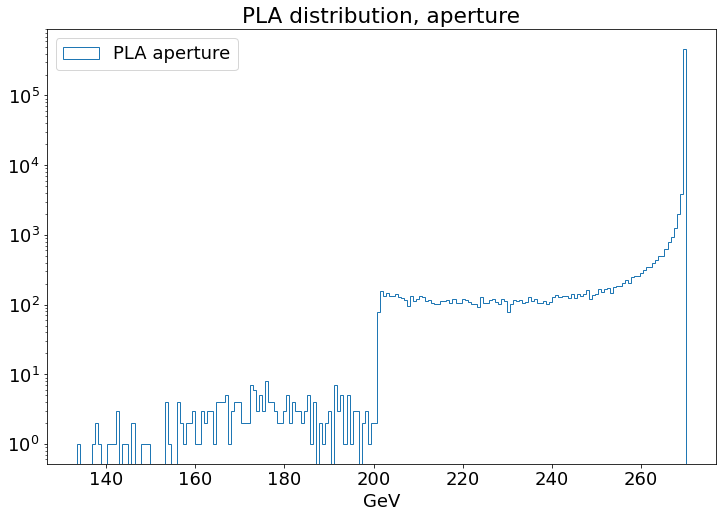

In [24]:
#Check particles in end
#select = (df_trj['Z'] <= 25500)
fig,ax = plt.subplots(figsize=(12,8))
plt.hist(df_trj['PLA'],bins=201,label='PLA aperture',histtype='step',log=True)
#plt.hist(df_trj['PLA'],bins=101,label='PLA All',histtype='step',log=True)

#plt.hist(df_flk['PMOFLK'],bins=101,label='PLA FLK',histtype='step',log=True)
ax.set_xlabel('GeV')
ax.set_title('PLA distribution, aperture')
#ax.set_xlim(-854,-853)
#ax.set_ylim(-0.5,0.5)
ax.legend(loc='upper left')
plt.show()

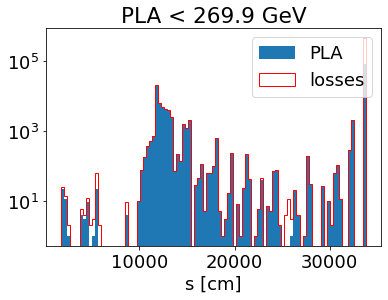

In [25]:
fig,ax = plt.subplots()
plt.hist(df_trj.loc[df_trj['PLA']<269.9,'Z'],bins=101,label='PLA',log=True,histtype='bar');
plt.hist(df_trj['Z'],bins=101,color='red',label='losses',log=True,histtype='step')
#plt.hist(df_tcsm.loc[df_tcsm['ISTATE']==3,'Z'],bins=101,label='PLA',log=True,histtype='bar');


plt.title('PLA < 269.9 GeV')
plt.xlabel('s [cm]')
plt.legend();

Text(0.5, 0, 'ISTATE')

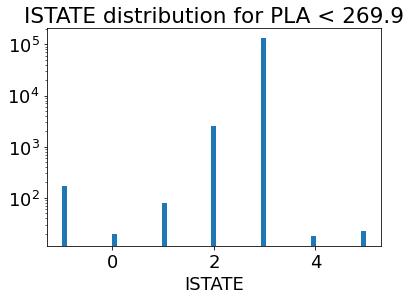

In [26]:
fig,ax=plt.subplots()
plt.hist(df_usr.loc[df_usr['PLA']<269.9,'ISTATE'],bins=61,histtype='bar',log=True)
plt.title('ISTATE distribution for PLA < 269.9')
plt.xlabel('ISTATE')

(0.0, 33000.0)

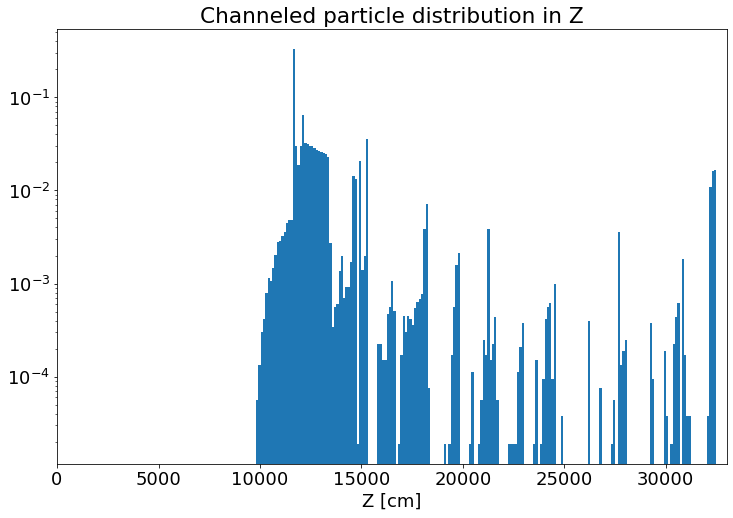

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
z1 = len(df_usr.loc[(df_usr['ISTATE']==3) & (df_usr['Z']<33000),'Z'])
w1 = np.full((z1),1/z1)
plt.hist(df_usr.loc[(df_usr['ISTATE']==3) & (df_usr['Z']<33000),'Z'],bins=201,histtype='bar',log=True,weights=w1)
plt.title('Channeled particle distribution in Z')
plt.xlabel('Z [cm]')
plt.xlim(0,33000)

In [28]:
#for i in range(-1,6):
 #   fig,ax=plt.subplots()
  #  plt.hist(df_usr.loc[(df_usr['PLA']<269.9) & (df_usr['ISTATE']==i),'PLA'],bins=61,histtype='step')
   # plt.title(f'PLA for ISTATE == {i}')
    #plt.xlabel('GeV')

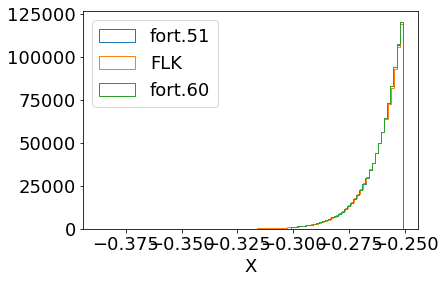

In [29]:
fig, ax = plt.subplots()

plt.hist(df_cry['X'],bins=36,histtype='step',label='fort.51')#,density=True)
plt.hist(df_flk['XFLK'],bins=100,histtype='step',label='FLK')#,density=True)
plt.hist(df_60['XSCO'],bins=36,histtype='step',label='fort.60')

ax.set_xlabel('X')
plt.legend(loc='upper left')
plt.show()

# _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ 
# _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ 
# _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ _ _  _ _ _ _ 

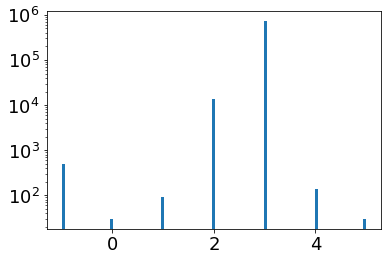

In [30]:
fig,ax = plt.subplots()
plt.hist(df_tcsm['ISTATE'],bins=101,log=True);

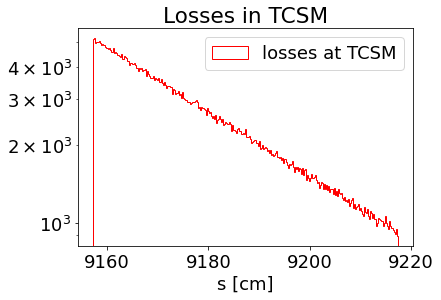

In [31]:
fig,ax = plt.subplots()
#plt.hist(df_trj['Z'],bins=61,label='PLA',log=True);
plt.hist(df_tcsm['Z'],bins=301,color='red',label='losses at TCSM',log=True,histtype='step')

plt.title('Losses in TCSM')
plt.xlabel('s [cm]')
#plt.xlim(0,9000)
plt.legend();


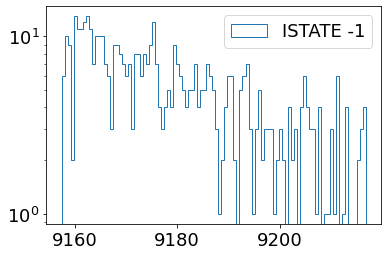

In [32]:
#fig,ax = plt.subplots()
#plt.hist(elastics['Z_new'],bins=101,log=True,histtype='bar',label='Elastic');
#plt.title('Elastic/ISTATE -1')
#plt.xlabel('S [cm]')

plt.hist(df_tcsm.loc[df_tcsm['ISTATE']==-1,'Z'],bins=101,log=True,label='ISTATE -1',histtype='step')
plt.legend()

Text(0.5, 1.0, 'KICK after TCSM')

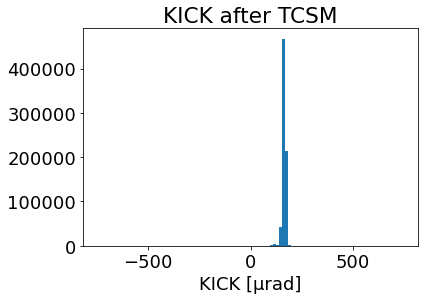

In [33]:
fig,ax=plt.subplots()
plt.hist(df_tcsm['KICK']*1e6,bins=101);
plt.xlabel('KICK [µrad]')
plt.title('KICK after TCSM')

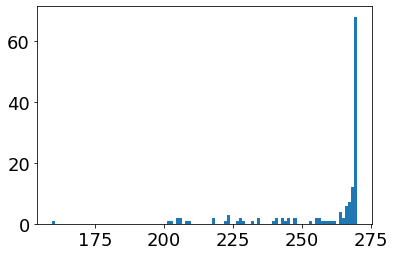

In [34]:
fig,ax=plt.subplots()
plt.hist(df_usr.loc[df_usr['Z']<9000,'PLA'],bins=101);

Text(0.5, 1.0, 'Angular distributions')

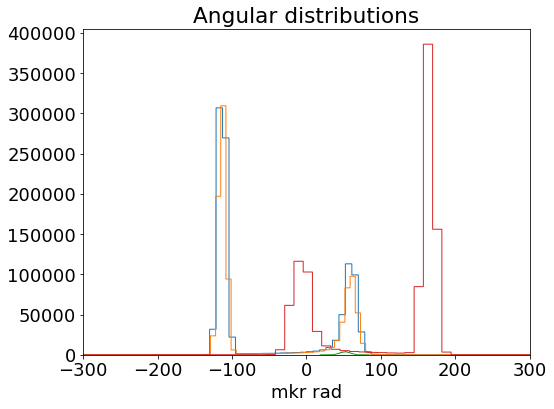

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(df_cry['CXTRCK']*1e6,bins=801,histtype='step',label='CXTRCK, fort.51')
plt.hist(df_61['CXTRCK']*1e6,bins=1001,histtype='step',label='CXTRCK, fort.61')

plt.hist(df_60['CXTRCK']*1e6,bins=1001,histtype='step',label='CXTRCK, fort.60')
plt.hist(df_cry['KICK']*1e6,bins=561,histtype='step',label='KICK, fort.51')


plt.xlim(-300,300)
#plt.legend(loc='upper left')
ax.set_xlabel('mkr rad')
ax.set_title('Angular distributions')

In [36]:
emit = -3.7E-9
emit = -3.7E-9/(270/0.938)
emit = -3.7E-9*(270/0.938)
#emit/270(GeV)/m_p(0.938 GeV)

#beta_cry1 = 90.50718105264866153
beta_cry1 = 76.16352912765354688
#beta_tacw0 = 76.16352912765354688
beta_tacw0 = 90.50718105264866153
beta_tcsm = 92.47518028212329000

L = np.sqrt(-emit*beta_cry1)
print(3.866*L, 6.462*L, 4.73*L, 7.33*L)

L2 = np.sqrt(-emit*beta_tacw0)
print('\n',3.866*L2, 6.462*L2, 4.73*L2, 9.32*L2)

L3 = np.sqrt(-emit*beta_tcsm)
print('\n',7.73*L3)

0.034819032892802554 0.058199842357291795 0.04260062741411177 0.06601746277916262

 0.03795637195539413 0.06344388918152014 0.04643912036963638 0.09150372132029831

 0.07671378520020981


In [37]:
-3.7E-9*(270/0.938)

-1.0650319829424308e-06

In [38]:
#Width of crystal in [m]
W = abs(0.004239-0.002737)
#Width corresponds to this many sigma
sig_w = W/(1*np.sqrt(-emit*beta_cry1))
print('sigma_width:', sig_w)

#Inner edge moved in 0.5mm is now this many sigma
#sig_05mm = 0.0005/(1*np.sqrt(-emit*beta2))
#print(sig_05mm)

sigma_inner = 4.73#-sig_05mm
sigma_outer = sigma_inner+sig_w

print('\nsigma_inner:',sigma_inner,'sigma_outer', sigma_outer, '(WHAT(10) and WHAT(4))')

sigma_width: 0.16676890532477454

sigma_inner: 4.73 sigma_outer 4.896768905324775 (WHAT(10) and WHAT(4))


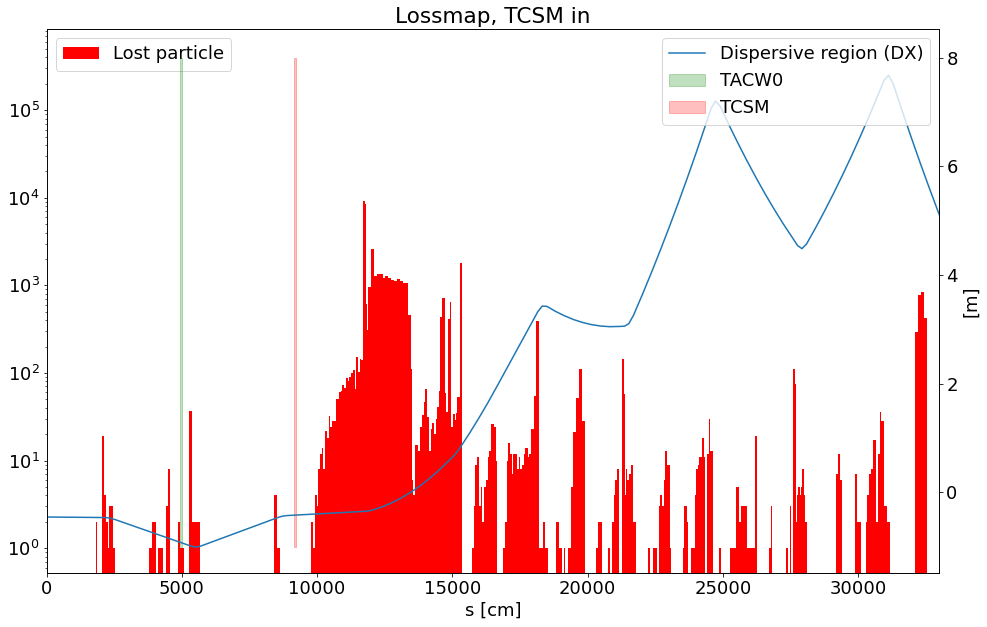

In [39]:
fig_tacw, ax_1 = plt.subplots(figsize=(16,10))
ax_2 = ax_1.twinx() 
ax_2.plot((S-(5129.9275))*100,DX,label='Dispersive region (DX)')
#ax_2.plot((S-(5129.9275))*100,-np.sqrt(DX**2+data_frame['BETX']*emit),label=r'-sqrt(DX^2 + ${\beta}$ ${\epsilon}$)')
ax_2.set_ylabel('[m]')

#ax_2.set_yscale('log')

#ax_1.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=5,label='CRY1 NI',color='red',log=True,histtype='bar',stacked=True);
#ax_1.hist(df_98.loc[df_98['ICODE']==101,'Z'],bins=201,label='TCSM NI',color='red',log=True,histtype='bar',stacked=True);

ax_1.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=301,label='Lost particle',color='red',log=True,histtype='bar',stacked=True);
ax_1.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=501,color='red',log=True,histtype='bar',stacked=True);
ax_1.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=301,color='red',log=True,histtype='bar',stacked=True);
#ax_1.vlines(18400,0,100,'r')
#ax_1.vlines(24750,0,100,'r')
ax_1.set_xlim(0,33000)
ax_1.set_xlabel('s [cm]')
ax_1.set_title('Lossmap, TCSM in')
#ax_1.legend(['Lost primary proton'],bbox_to_anchor=(0.29,0.88))

blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
#ax_1.vlines(blms,0,1e5, color='k',linestyles='dashed',label='BLM')
#for i in blms: 
 #   ax_1.axvline(i, color='k',label='BLM',ls='--')
    
#ax_2.fill_between([75,110], [-1],[8], color='brown', alpha=0.25,label='CRY1')
ax_2.fill_between([4930,5010], [-1],[8], color='green', alpha=0.25,label='TACW0')
#ax_2.fill_between([5300,5500], [-1],[8], color='blue', alpha=0.1,label='QF Magnet')
#ax_2.fill_between([8400,8600], [-1],[8], color='magenta', alpha=0.1,label='QD Magnet')
ax_2.fill_between([9150,9225], [-1],[8], color='red', alpha=0.25,label='TCSM')
#ax_2.fill_between([11400,11485], [-1],[8], color='purple', alpha=0.25,label='TACW1')

#ax_1.axvline([340,500], color='k',label='BLM',ls='--')
ax_1.legend(loc='upper left');
ax_2.legend(loc='upper right');


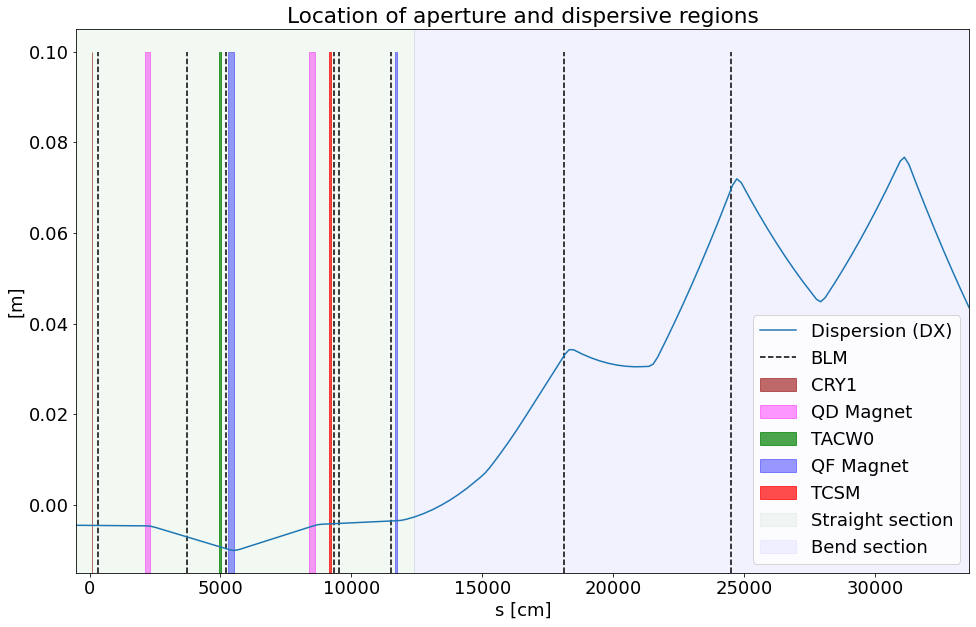

In [79]:
fig_2, ax_2 = plt.subplots(figsize=(16,10))

ax_2.plot((S-(5129.9275))*100,DX*0.01,label='Dispersion (DX)')
ax_2.set_xlabel('s [cm]')
ax_2.set_ylabel('[m]')
ax_2.set_xlim(-500,33600)
ax_2.set_ylim(-0.015,0.105)

ax_2.set_title('Location of aperture and dispersive regions')

#ax_2.plot((S-(5129.9275))*100,data_frame['BETX']*0.01,label='Beta function')

blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
ax_2.vlines(blms,-0.015,0.1, color='k',linestyles='dashed',label='BLM')

ax_2.fill_between([75,110], [-0.015],[0.1], color='brown', alpha=0.7,label='CRY1')
ax_2.fill_between([2100,2300], [-0.015],[0.1], color='magenta', alpha=0.4,label='QD Magnet')
ax_2.fill_between([4930,5010], [-0.015],[0.1], color='green', alpha=0.7,label='TACW0')
ax_2.fill_between([5300,5500], [-0.015],[0.1], color='blue', alpha=0.4,label='QF Magnet')
ax_2.fill_between([8400,8600], [-0.015],[0.1], color='magenta', alpha=0.4)
ax_2.fill_between([9150,9225], [-0.015],[0.1], color='red', alpha=0.7,label='TCSM')
#ax_2.fill_between([11400,11550], [-0.015],[0.1], color='purple', alpha=0.3,label='TACW1')
ax_2.fill_between([11650,11750], [-0.015],[0.1], color='blue', alpha=0.4)

ax_2.fill_between([-500,12400], [-0.015],[0.12], color='green', alpha=0.05,label='Straight section')
ax_2.fill_between([12400,40000], [-0.015],[0.12], color='blue', alpha=0.05,label='Bend section')

ax_2.legend(loc='lower right');

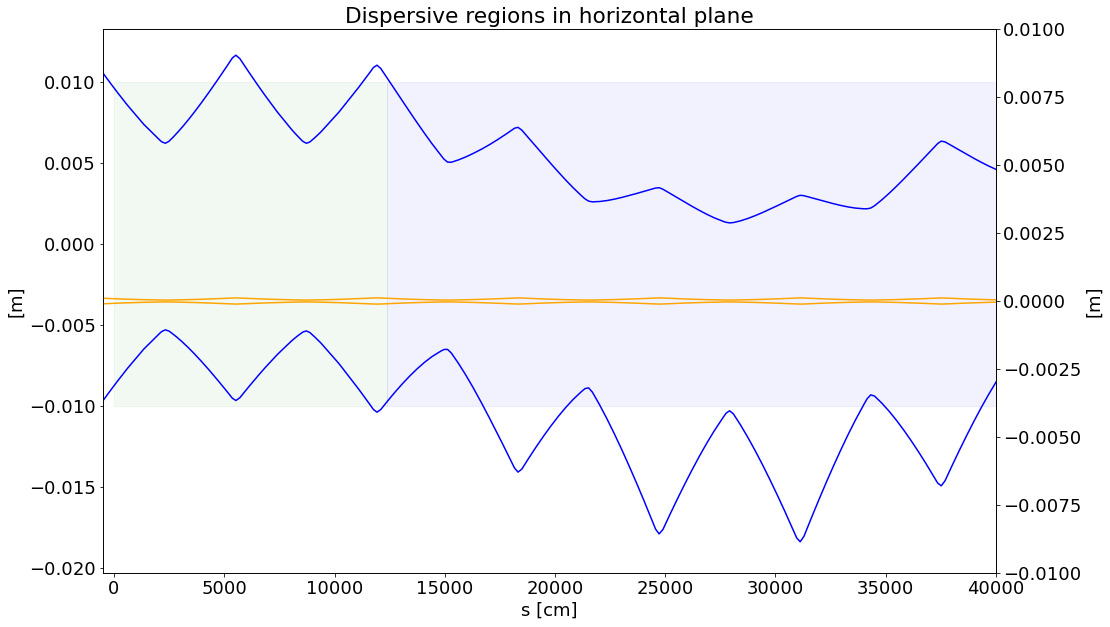

In [41]:
fig_2, ax_2 = plt.subplots(figsize=(16,10))
ax_1 = ax_2.twinx() 

#ax_2.plot((S-(5129.9275))*100,DX,label=r'${\frac{\delta P}{P}}$ = 0 (scaled)')
ax_2.plot((S-(5129.9275))*100,-DX*0.001+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = -1e3',color='blue')
ax_2.plot((S-(5129.9275))*100,-DX*0.001-np.sqrt(-data_frame['BETX']*emit),color='blue')


ax_2.set_xlabel('s [cm]')
ax_2.set_ylabel('[m]')
ax_2.set_xlim(-500,40000)
ax_2.set_title('Location of aperture and dispersive regions')
ax_2.set_title('Dispersive regions in horizontal plane')


ax_1.plot((S-(5129.9275))*100,-data_frame['BETX']*emit,label=r'${\frac{\delta P}{P}}$ = 0',color='orange')
ax_1.plot((S-(5129.9275))*100,data_frame['BETX']*emit,color='orange')
ax_1.set_ylim(-1e-2,1e-2)
ax_1.set_ylabel('[m]')


ax_2.fill_between([0,12400], [-0.01],[0.01], color='green', alpha=0.05,label='Straight section')
ax_2.fill_between([12400,40000], [-0.01],[0.01], color='blue', alpha=0.05,label='Bend section')

#blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
#ax_2.vlines(blms,-1,8, color='k',linestyles='dashed',label='BLM')

#ax_2.fill_between([75,110], [-1],[8], color='brown', alpha=0.25,label='CRY1')
#ax_2.fill_between([4930,5010], [-1],[8], color='green', alpha=0.25,label='TACW0')
#ax_2.fill_between([5300,5500], [-1],[8], color='blue', alpha=0.1,label='QF Magnet')
#ax_2.fill_between([8400,8600], [-1],[8], color='magenta', alpha=0.1,label='QD Magnet')
#ax_2.fill_between([9150,9225], [-1],[8], color='red', alpha=0.25,label='TCSM')
#ax_2.fill_between([11400,11550], [-1],[8], color='purple', alpha=0.25,label='TACW1')

#ax_2.legend(loc='upper left');
#ax_1.legend();

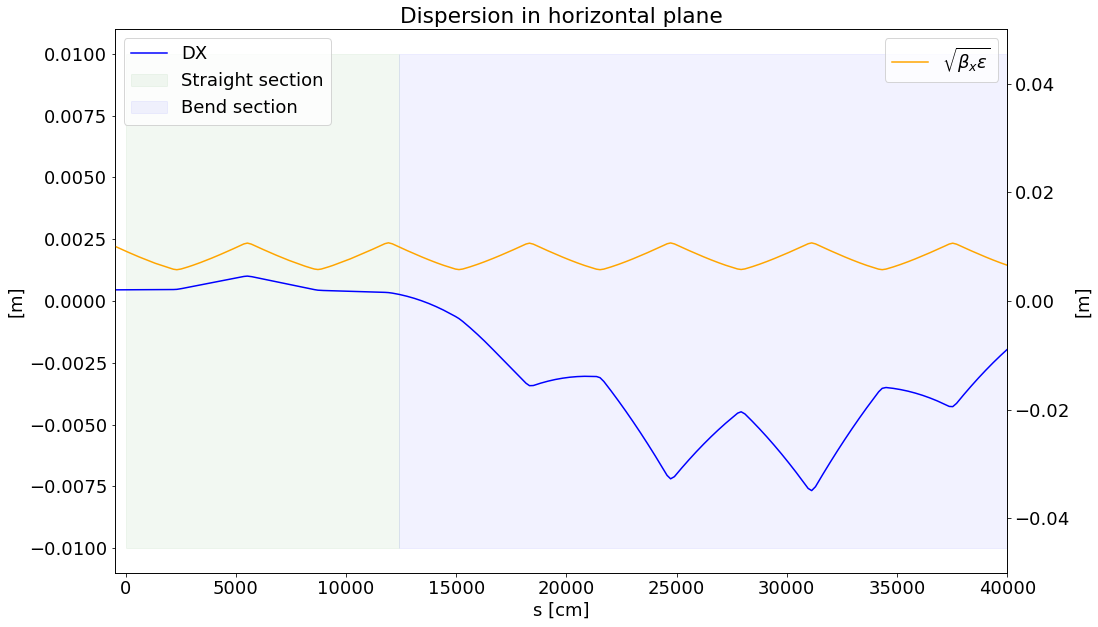

In [42]:
fig_2, ax_2 = plt.subplots(figsize=(16,10))
ax_1 = ax_2.twinx() 

ax_2.fill_between([0,12400], [-0.01],[0.01], color='green', alpha=0.05,label='Straight section')
ax_2.fill_between([12400,40000], [-0.01],[0.01], color='blue', alpha=0.05,label='Bend section')
#ax_2.plot((S-(5129.9275))*100,DX,label=r'${\frac{\delta P}{P}}$ = 0 (scaled)')
#ax_2.plot((S-(5129.9275))*100,-DX*0.001+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = -1e3',color='blue')
ax_2.plot((S-(5129.9275))*100,-DX*0.001,color='blue',label='DX')


ax_2.set_xlabel('s [cm]')
ax_2.set_ylabel('[m]')
ax_2.set_xlim(-500,40000)
ax_2.set_title('Location of aperture and dispersive regions')
ax_2.set_title('Dispersion in horizontal plane')


ax_1.plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit),label=r'${\sqrt{\beta_x\epsilon}}$',color='orange')
#ax_1.plot((S-(5129.9275))*100,data_frame['BETX']*emit,color='orange')
ax_1.set_ylim(-5e-2,5e-2)
ax_1.set_ylabel('[m]')




#blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
#ax_2.vlines(blms,-1,8, color='k',linestyles='dashed',label='BLM')

#ax_2.fill_between([75,110], [-1],[8], color='brown', alpha=0.25,label='CRY1')
#ax_2.fill_between([4930,5010], [-1],[8], color='green', alpha=0.25,label='TACW0')
#ax_2.fill_between([5300,5500], [-1],[8], color='blue', alpha=0.1,label='QF Magnet')
#ax_2.fill_between([8400,8600], [-1],[8], color='magenta', alpha=0.1,label='QD Magnet')
#ax_2.fill_between([9150,9225], [-1],[8], color='red', alpha=0.25,label='TCSM')
#ax_2.fill_between([11400,11550], [-1],[8], color='purple', alpha=0.25,label='TACW1')

ax_1.legend(loc='upper right');
ax_2.legend(loc='upper left');

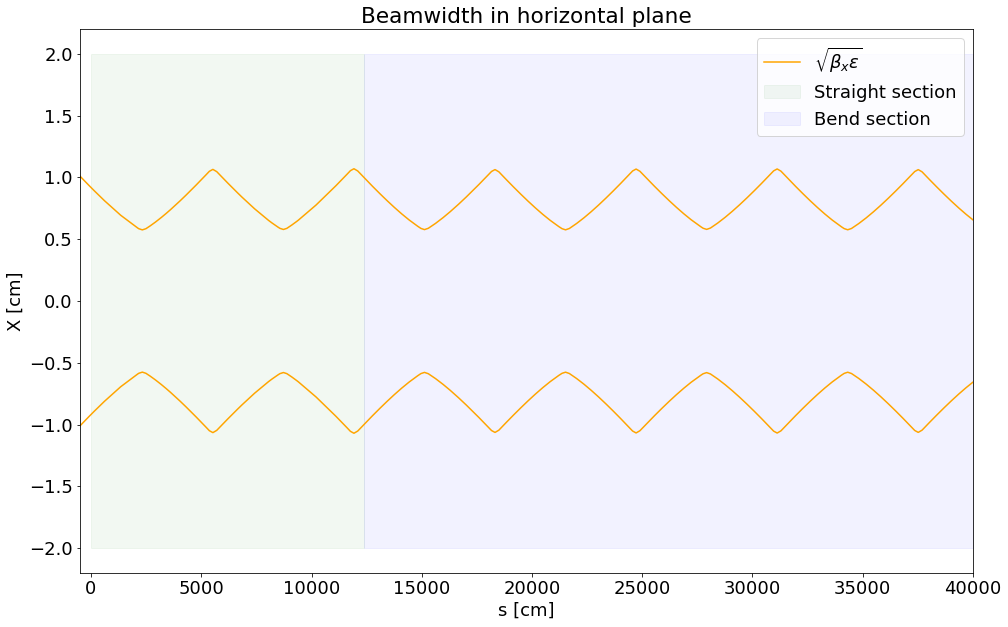

In [43]:
fig,ax_1 = plt.subplots(figsize=(16,10))

ax_1.fill_between([0,12400], [-2],[2], color='green', alpha=0.05,label='Straight section')
ax_1.fill_between([12400,40000], [-2],[2], color='blue', alpha=0.05,label='Bend section')
#ax_2.plot((S-(5129.9275))*100,DX,label=r'${\frac{\delta P}{P}}$ = 0 (scaled)')
#ax_2.plot((S-(5129.9275))*100,-DX*0.001+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = -1e3',color='blue')
#ax_2.plot((S-(5129.9275))*100,-DX*0.001,color='blue',label='DX')


ax_1.set_xlabel('s [cm]')
#ax_2.set_ylabel('[m]')
ax_1.set_xlim(-500,40000)
#ax_2.set_title('Location of aperture and dispersive regions')
ax_1.set_title('Beamwidth in horizontal plane')


ax_1.plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit)*100,label=r'${\sqrt{\beta_x\epsilon}}$',color='orange')
ax_1.plot((S-(5129.9275))*100,-np.sqrt(-data_frame['BETX']*emit)*100,color='orange')

#ax_1.plot((S-(5129.9275))*100,data_frame['BETX']*emit,color='orange')
#ax_1.set_ylim(-5e-2,5e-2)
ax_1.set_ylabel('X [cm]')




#blms=np.asarray([340, 3720, 5210, 9345, 9540, 11500, 18120, 24492])
#ax_2.vlines(blms,-1,8, color='k',linestyles='dashed',label='BLM')

#ax_2.fill_between([75,110], [-1],[8], color='brown', alpha=0.25,label='CRY1')
#ax_2.fill_between([4930,5010], [-1],[8], color='green', alpha=0.25,label='TACW0')
#ax_2.fill_between([5300,5500], [-1],[8], color='blue', alpha=0.1,label='QF Magnet')
#ax_2.fill_between([8400,8600], [-1],[8], color='magenta', alpha=0.1,label='QD Magnet')
#ax_2.fill_between([9150,9225], [-1],[8], color='red', alpha=0.25,label='TCSM')
#ax_2.fill_between([11400,11550], [-1],[8], color='purple', alpha=0.25,label='TACW1')

ax_1.legend(loc='upper right');
#ax_2.legend(loc='upper left');

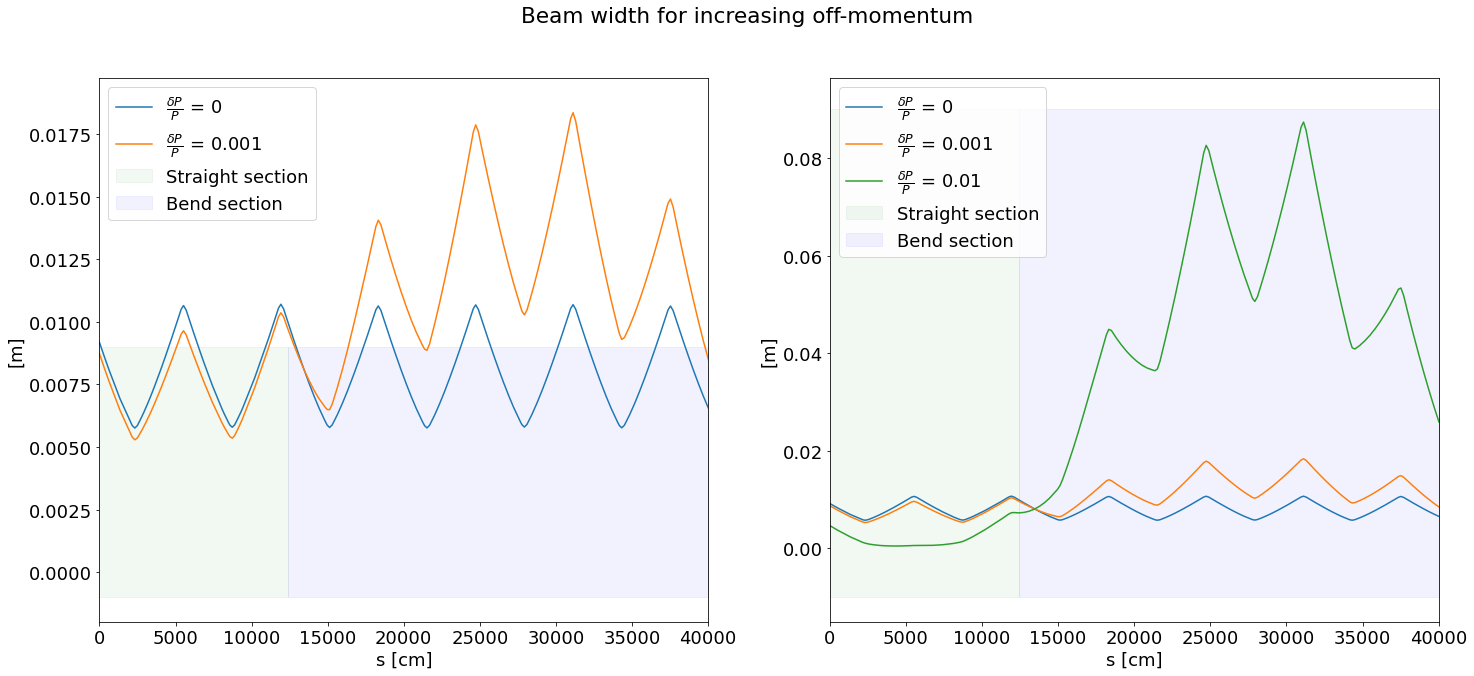

In [44]:
fig_tacw, ax_1 = plt.subplots(1,2,figsize=(24,10))
#ax_2 = ax_1.twinx() 
#ax_2.plot((S-(5129.9275))*100,DX,label='Dispersive region (DX)')
#ax_2.plot((S-(5129.9275))*100,-np.sqrt(DX**2+data_frame['BETX']*emit),label=r'-sqrt(DX^2 + ${\beta}$ ${\epsilon}$)')
ax_1[0].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0')
ax_1[0].plot((S-(5129.9275))*100,DX*0.001+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0.001')
#ax_1[0].plot((S-(5129.9275))*100,DX*0.01+np.sqrt(-data_frame['BETX']*emit),label=r'DX*0.01 + sqrt(${\beta}$ ${\epsilon}$))')
ax_1[0].set_ylabel('[m]')
ax_1[0].set_xlim(0,40000)
ax_1[0].set_xlabel('s [cm]')
ax_1[0].fill_between([0,12400], [-0.001],[0.009], color='green', alpha=0.05,label='Straight section')
ax_1[0].fill_between([12400,40000], [-0.001],[0.009], color='blue', alpha=0.05,label='Bend section')
ax_1[0].legend();



ax_1[1].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0')
ax_1[1].plot((S-(5129.9275))*100,DX*0.001+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0.001')
ax_1[1].plot((S-(5129.9275))*100,DX*0.01+np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0.01')
ax_1[1].set_ylabel('[m]')
ax_1[1].set_xlim(0,40000)
ax_1[1].set_xlabel('s [cm]')
ax_1[1].fill_between([0,12400], [-0.01],[0.09], color='green', alpha=0.05,label='Straight section')
ax_1[1].fill_between([12400,40000], [-0.01],[0.09], color='blue', alpha=0.05,label='Bend section')
ax_1[1].legend();

fig_tacw.suptitle('Beam width for increasing off-momentum');

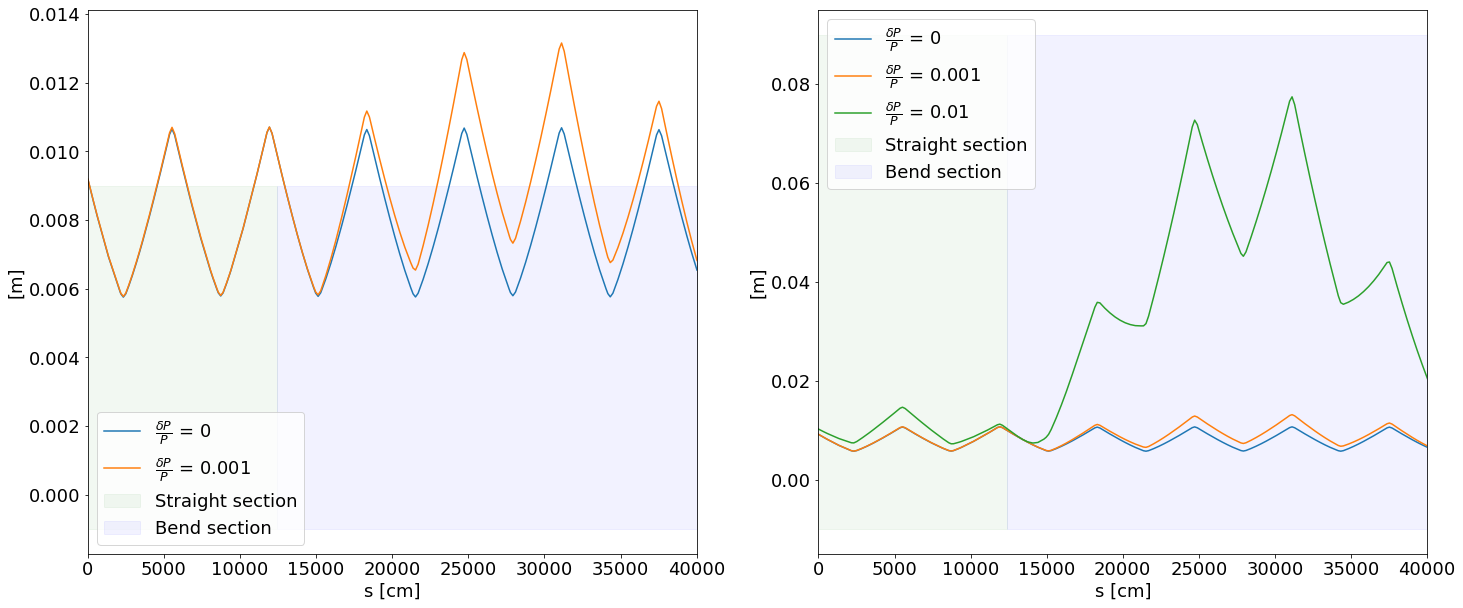

In [45]:
fig_tacw, ax_1 = plt.subplots(1,2,figsize=(24,10))


ax_1[0].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0')
ax_1[0].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit+(DX*0.001)**2),label=r'${\frac{\delta P}{P}}$ = 0.001')
ax_1[0].set_ylabel('[m]')
ax_1[0].set_xlim(0,40000)
ax_1[0].set_xlabel('s [cm]')
ax_1[0].fill_between([0,12400], [-0.001],[0.009], color='green', alpha=0.05,label='Straight section')
ax_1[0].fill_between([12400,40000], [-0.001],[0.009], color='blue', alpha=0.05,label='Bend section')
ax_1[0].legend();

ax_1[1].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit),label=r'${\frac{\delta P}{P}}$ = 0')
ax_1[1].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit+(DX*0.001)**2),label=r'${\frac{\delta P}{P}}$ = 0.001')
ax_1[1].plot((S-(5129.9275))*100,np.sqrt(-data_frame['BETX']*emit+(DX*0.01)**2),label=r'${\frac{\delta P}{P}}$ = 0.01')
ax_1[1].set_ylabel('[m]')
ax_1[1].set_xlim(0,40000)
ax_1[1].set_xlabel('s [cm]')
ax_1[1].fill_between([0,12400], [-0.01],[0.09], color='green', alpha=0.05,label='Straight section')
ax_1[1].fill_between([12400,40000], [-0.01],[0.09], color='blue', alpha=0.05,label='Bend section')
ax_1[1].legend();

51.774862274040515
mean  fit:  51.72792698870639
sigma fit:  7.192564054652669


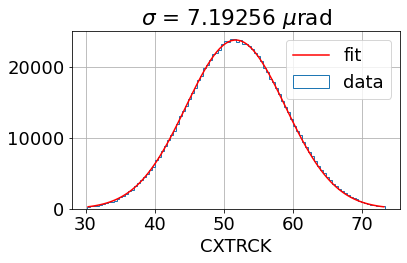

7.192564054652669

In [46]:
#You have an entrance angle of 51 mikrorad. These are subtracted as to normalize the angular distribution to the 
#incoming angle
res(df_60['CXTRCK']*1e6)

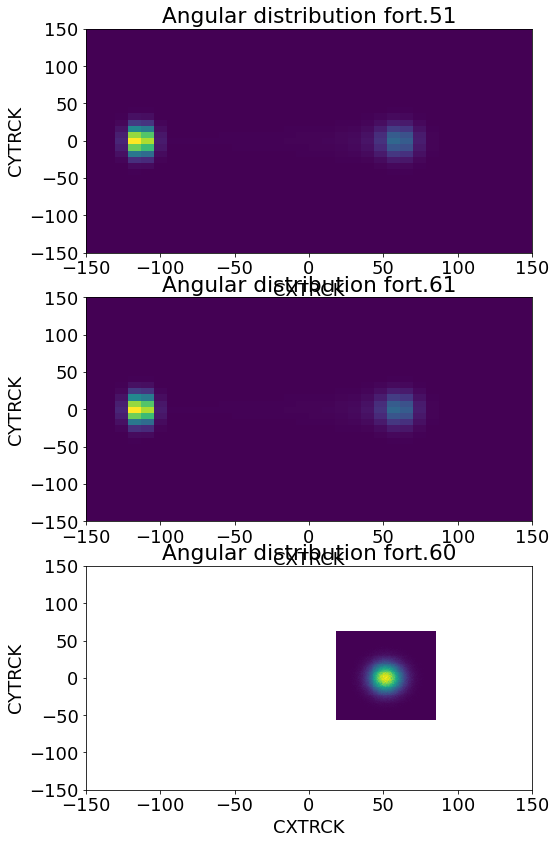

In [47]:
fig, ax = plt.subplots(3,1,figsize=(8,14))
ax[0].hist2d(df_cry['CXTRCK']*1e6,df_cry['CYTRCK']*1e6,bins=801)
ax[0].set_xlabel('CXTRCK')
ax[0].set_ylabel('CYTRCK')
ax[0].set_title('Angular distribution fort.51')
ax[0].set_xlim(-150,150)
ax[0].set_ylim(-150,150)


ax[1].hist2d(df_61['CXTRCK']*1e6,df_61['CYTRCK']*1e6,bins=801)
ax[1].set_xlabel('CXTRCK')
ax[1].set_ylabel('CYTRCK')
ax[1].set_title('Angular distribution fort.61')
ax[1].set_xlim(-150,150)
ax[1].set_ylim(-150,150)

ax[2].hist2d(df_60['CXTRCK']*1e6,df_60['CYTRCK']*1e6,bins=101)
ax[2].set_xlabel('CXTRCK')
ax[2].set_ylabel('CYTRCK')
ax[2].set_title('Angular distribution fort.60')
ax[2].set_xlim(-150,150)
ax[2].set_ylim(-150,150)

plt.show()

# Load data

In [48]:
df_cft = df_60.loc[df_60['NPASSAGE'] == 1]

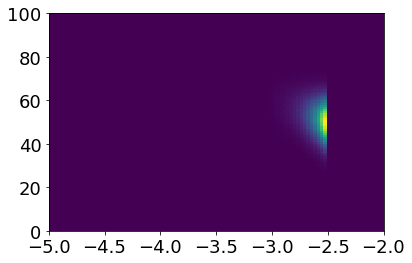

In [49]:
fig, ax = plt.subplots()
xbins2 = np.linspace(-5,-2,101)
ybins2 = np.linspace(0,100,101)

plt.hist2d(df_cft['XSCO']*10,df_cft['CXTRCK']*1e6, bins=[xbins2,ybins2],density=True);
plt.show()

In [50]:
df_60.describe()
df_61.describe()
df_c = pd.merge(df_60, df_61,left_index=True, right_index=True, suffixes=('_up','_dw'))

In [51]:
def linear (a,b,x):
    return (a*x)+b

def gaussian(x, mu, sig, A):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
#g =  gaussian(np.linspace(-100, 100, 2000),0.0,10.0)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gaussian(x,mu1,sigma1,A1)+gaussian(x,mu2,sigma2,A2)


def defl_cont(x,x_am,x_ch,mu1,sig1,A1,tau,A3,mu2,sig2,A2):
    return np.piecewise(x, [(x < x_am) , (x > x_am) & (x < x_ch) , (x > x_ch)], [lambda x: A1*np.exp(-np.power(x - mu1, 2.) / (2 * np.power(sig1, 2.))), 
                                                                                 lambda x: A1*np.exp(-np.power(x_am - mu1, 2.) / (2 * np.power(sig1, 2.))) +
                                                                                           A3*(np.exp(-x/tau) - np.exp(-x_am/tau))+
                                                                                           A2*(np.exp(-np.power(x_ch - mu2, 2.) / (2 * np.power(sig2, 2.)))),
                                                                                 lambda x: A1*np.exp(-np.power(x_am - mu1, 2.) / (2 * np.power(sig1, 2.))) +
                                                                                           A3*(np.exp(-x_ch/tau) - np.exp(-x_am/tau)) + 
                                                                                           #A2*(np.exp(-np.power(x - mu2, 2.) / (2 * np.power(sig2, 2.)) - np.exp(-np.power(x_ch - mu2, 2.) / (2 * np.power(sig2, 2.)))))])
                                                                                           A2*(np.exp(-np.power(x - mu2, 2.) / (2 * np.power(sig2, 2.))))])

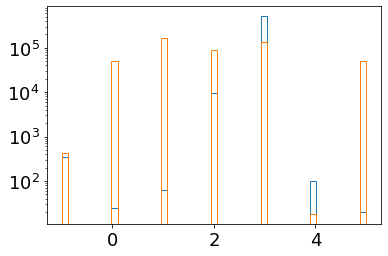

In [52]:
fig,ax = plt.subplots()
plt.hist(df_tcsm.loc[df_tcsm['ICODE']==101,'ISTATE'],bins=49,log = True,histtype='step',stacked=True);
plt.hist(df_usr['ISTATE'],bins=49,log = True,histtype='step',stacked=True);
